In [68]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

In [69]:
df = pd.read_csv('combined_df.csv')

In [70]:
df['morning_appt'] = df['appointment_time'].apply(lambda x: 1 if x.lower() == 'morning' else 0)
df.drop(columns = ['appointment_time', 'Unnamed: 0'], inplace = True)

X = df.drop(columns=['morning_appt'])
y = df['morning_appt']

categorical_cols = ['intake_method', 'referer', 'age', 'appointment_location']
numeric_cols = ['Medication_Management', 'Talk_Therapy']

In [71]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_encoded.head()

,Medication_Management,Talk_Therapy,intake_method_Boom Form,intake_method_Call,intake_method_Other,intake_method_Text,intake_method_Unknown,intake_method_Virtual,intake_method_Waitlist,referer_Alison D'Mello,...,age_40-50,age_50-60,age_60-70,age_70-80,age_80-90,age_Other,age_Unknown,appointment_location_Princeton,appointment_location_Unknown,appointment_location_Virtual
0,0,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
y.value_counts() / y.shape[0]

,count
morning_appt,
0,0.753933
1,0.246067


In [73]:
X_encoded.columns

Index(['Medication_Management', 'Talk_Therapy', 'intake_method_Boom Form',
       'intake_method_Call', 'intake_method_Other', 'intake_method_Text',
       'intake_method_Unknown', 'intake_method_Virtual',
       'intake_method_Waitlist', 'referer_Alison D'Mello',
       'referer_Bariatric Doctor', 'referer_Client of Alexis',
       'referer_Client of Alyssa', 'referer_Client of Ariella',
       'referer_Client of Marissa', 'referer_Community Event',
       'referer_Current Client', 'referer_Facebook', 'referer_Family/Friend',
       'referer_Flyer', 'referer_Following Clinician',
       'referer_Google Referral', 'referer_Google or another search engine',
       'referer_HLOC', 'referer_Healthcare Provider', 'referer_Hospital',
       'referer_IOP', 'referer_Insurance Company',
       'referer_Internal TOL Referral', 'referer_Internal TOL Referral ',
       'referer_Neuro Testing Evaluation', 'referer_Non-Profit Organization',
       'referer_Other', 'referer_Outpatient Therapy Practi

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=1234, stratify=y
)

In [75]:
model = DecisionTreeClassifier(max_depth=12, random_state=1234)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=1234)

In [76]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.7303370786516854


In [77]:
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split. Default: gini.
    '''

    # 1. Create the  DecisionTreeClassifier model object below and assign to variable 'model'
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf, random_state = 1234)

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)

    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    class_label_predictions = model.predict(X_test)

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    # acc_score = accuracy_score(y_test, class_label_predictions)
    f1 = f1_score(y_test, class_label_predictions, average='weighted')
    recall_pos = recall_score(y_test, y_pred, pos_label=1)


    # return acc_score, f1
    return f1, recall_pos

Finding best DT model based on f1 score

In [78]:
max_depth_range = [4, 5, 6, 7, 8, 9, 10, 16, 32, 64]
min_leaf_range = [1, 2, 5, 8, 9, 10, 11, 12, 13, 15, 20, 35, 30]

# acc = []
recalls = []
f1s = []
best_results_f1 = [0, 4, 1] # (f1_score, max_depth, min_leaf)

for md in max_depth_range:
  for leaf in min_leaf_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, leaf, md)
    # print('Max Depth=' + str(md) + ', Min Leaf = ' + str(leaf) + ', accuracy score: ' + str(score[0]) + ', f1 score: ' + str(score[1]))
    # print('Max Depth=' + str(md) + ', Min Leaf = ' + str(leaf) + ', f1 score: ' + str(score[0]) + ', recall score: ' + str(score[1]))
    # acc.append(float(score[0]))
    # f1s.append(float(score[1]))
    f1s.append(float(score[0]))
    recalls.append(float(score[1]))
    if (score[0] > float(best_results_f1[0])):
      best_results_f1[0] = float(score[0])
      best_results_f1[1] = float(md)
      best_results_f1[2] = float(leaf)

    # if (score[1] > float(best_results[0])):
    #   best_results[0] = float(score[1])
    #   best_results[1] = float(md)
    #   best_results[2] = float(leaf)
  print('\n')

print(best_results_f1)






















[0.6981701444622793, 32.0, 1.0]


Create a model using the best hyperparameter values

In [79]:
# Train the model using the best hyperparameters
best_max_depth_f1 = int(best_results_f1[1])
best_min_leaf_f1 = int(best_results_f1[2])

final_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=best_max_depth_f1,
    min_samples_leaf=best_min_leaf_f1,
    random_state=1234
)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=32, random_state=1234)

Evaluate

In [80]:
# Evaluate the model with precision, recall, and F1-score
y_pred = final_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC AUC Score (requires binary or one-vs-all approach for multi-class)
roc_auc = roc_auc_score(
    y_test,
    final_model.predict(X_test)
)
print(f"ROC AUC Score: {roc_auc:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       403
           1       0.41      0.21      0.28       131

    accuracy                           0.73       534
   macro avg       0.59      0.56      0.56       534
weighted avg       0.69      0.73      0.70       534

ROC AUC Score: 0.56


In [81]:
importances = final_model.feature_importances_
feature_names = X_encoded.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fi_df.head(15)

,feature,importance
60,appointment_location_Virtual,0.124602
58,appointment_location_Princeton,0.075879
8,intake_method_Waitlist,0.064139
47,referer_Unknown,0.063036
3,intake_method_Call,0.057433
1,Talk_Therapy,0.050942
18,referer_Family/Friend,0.050679
49,age_20-30,0.048011
2,intake_method_Boom Form,0.042508
22,referer_Google or another search engine,0.042428


/tmp/ipython-input-2805155244.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(fi_df['feature'][:10], rotation = 90)


Text(0, 0.5, 'Normalized importance')

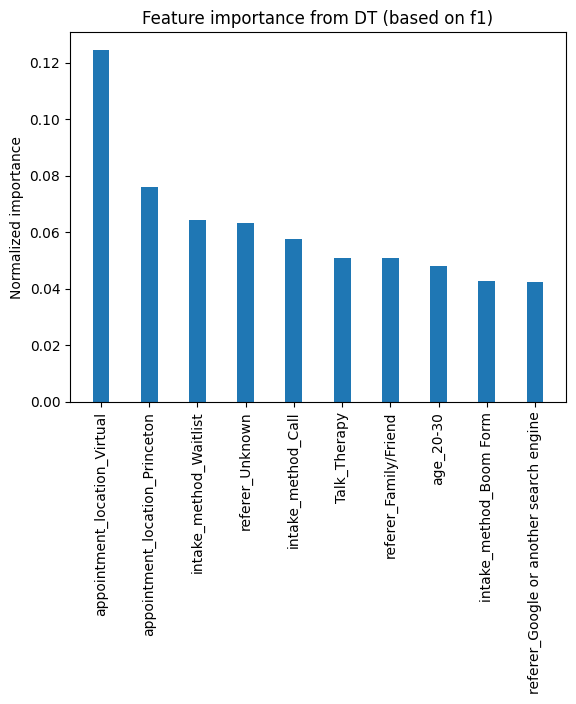

In [82]:
fig, ax = plt.subplots()

ax.bar(fi_df['feature'][:10], fi_df['importance'][:10], width = 0.35)
#ax.set_xticks(np.arange(10))
ax.set_xticklabels(fi_df['feature'][:10], rotation = 90)
plt.title('Feature importance from DT (based on f1)')
ax.set_ylabel('Normalized importance')

Finding best DT based on recall

In [83]:
max_depth_range = [4, 5, 6, 7, 8, 9, 10, 16, 32, 64]
min_leaf_range = [1, 2, 5, 8, 9, 10, 11, 12, 13, 15, 20, 35, 30]

# acc = []
recalls = []
f1s = []
best_results_recall = [0, 4, 1] # (f1_score, max_depth, min_leaf)

for md in max_depth_range:
  for leaf in min_leaf_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, leaf, md)
    # print('Max Depth=' + str(md) + ', Min Leaf = ' + str(leaf) + ', accuracy score: ' + str(score[0]) + ', f1 score: ' + str(score[1]))
    # print('Max Depth=' + str(md) + ', Min Leaf = ' + str(leaf) + ', f1 score: ' + str(score[0]) + ', recall score: ' + str(score[1]))
    # acc.append(float(score[0]))
    # f1s.append(float(score[1]))
    f1s.append(float(score[0]))
    recalls.append(float(score[1]))
    if (score[1] > float(best_results_recall[0])):
      best_results_recall[0] = float(score[1])
      best_results_recall[1] = float(md)
      best_results_recall[2] = float(leaf)
  print('\n')

print(best_results_recall)





















[0.21374045801526717, 4.0, 1.0]


Train DT using best hyperparameters (in terms of recall)

In [84]:
# Train the model using the best hyperparameters
best_max_depth_recall = int(best_results_recall[1])
best_min_leaf_recall = int(best_results_recall[2])

final_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=best_max_depth_recall,
    min_samples_leaf=best_min_leaf_recall,
    random_state=1234
)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1234)

Evaluate

In [85]:
# Evaluate the model with precision, recall, and F1-score
y_pred = final_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC AUC Score (requires binary or one-vs-all approach for multi-class)
roc_auc = roc_auc_score(
    y_test,
    final_model.predict(X_test)
)
print(f"ROC AUC Score: {roc_auc:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       403
           1       0.29      0.02      0.03       131

    accuracy                           0.75       534
   macro avg       0.52      0.50      0.44       534
weighted avg       0.64      0.75      0.65       534

ROC AUC Score: 0.50


In [86]:
importances = final_model.feature_importances_
feature_names = X_encoded.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fi_df.head(15)

,feature,importance
8,intake_method_Waitlist,0.323172
0,Medication_Management,0.208385
48,age_10-20,0.176415
47,referer_Unknown,0.115159
55,age_80-90,0.037116
53,age_60-70,0.033888
23,referer_HLOC,0.033649
4,intake_method_Other,0.026446
5,intake_method_Text,0.019491
60,appointment_location_Virtual,0.019077


/tmp/ipython-input-40713520.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(fi_df['feature'][:10], rotation = 90)


Text(0, 0.5, 'Normalized importance')

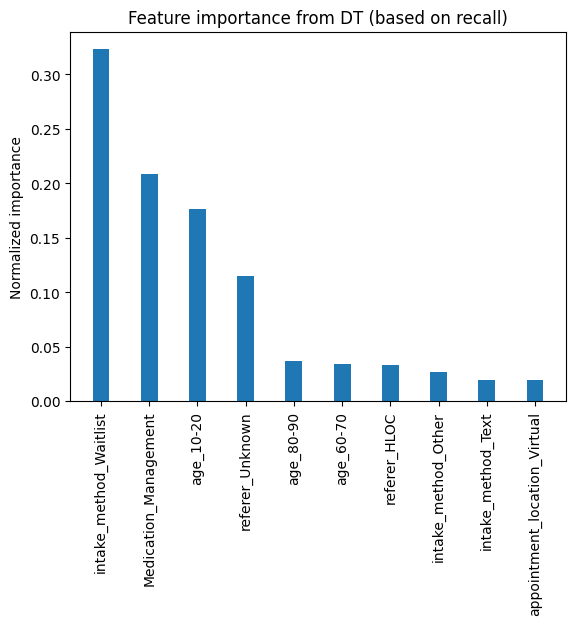

In [87]:
fig, ax = plt.subplots()

ax.bar(fi_df['feature'][:10], fi_df['importance'][:10], width = 0.35)
#ax.set_xticks(np.arange(10))
ax.set_xticklabels(fi_df['feature'][:10], rotation = 90)
plt.title('Feature importance from DT (based on recall)')
ax.set_ylabel('Normalized importance')

## Cost-Sensitive Learning

Using best hyperparameters based on f1 scores

In [88]:
# Example costs
C01 = 1.0   # cost false positive
C10 = 5.0   # cost false negative
class_weight = {0: C01, 1: C10}

# best_max_depth = int(best_results[1])
# best_min_leaf = int(best_results[2])

model = DecisionTreeClassifier(
    max_depth=best_max_depth_f1,
    min_samples_leaf=best_min_leaf_f1,
    class_weight = class_weight
)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 5.0}, max_depth=32)

In [89]:
# Evaluate the model with precision, recall, and F1-score
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC AUC Score (requires binary or one-vs-all approach for multi-class)
roc_auc = roc_auc_score(
    y_test,
    model.predict(X_test)
)
print(f"ROC AUC Score: {roc_auc:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.62      0.71       403
           1       0.33      0.57      0.42       131

    accuracy                           0.61       534
   macro avg       0.57      0.60      0.56       534
weighted avg       0.70      0.61      0.64       534

ROC AUC Score: 0.60


In [90]:
importances = model.feature_importances_
feature_names = X_encoded.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fi_df.head(15)

,feature,importance
60,appointment_location_Virtual,0.126594
8,intake_method_Waitlist,0.097565
58,appointment_location_Princeton,0.073933
47,referer_Unknown,0.073622
3,intake_method_Call,0.049560
0,Medication_Management,0.045290
49,age_20-30,0.044482
48,age_10-20,0.043643
2,intake_method_Boom Form,0.042993
22,referer_Google or another search engine,0.040016


/tmp/ipython-input-2967980569.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(fi_df['feature'][:10], rotation = 90)


Text(0, 0.5, 'Normalized importance')

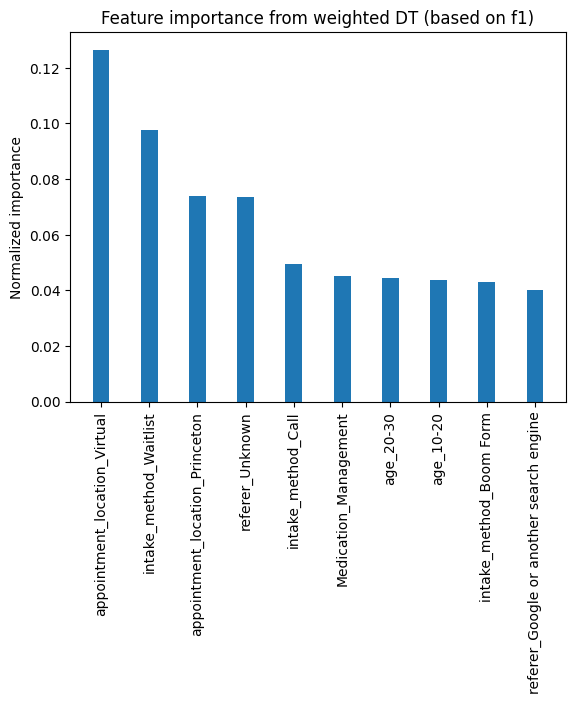

In [91]:
fig, ax = plt.subplots()

ax.bar(fi_df['feature'][:10], fi_df['importance'][:10], width = 0.35)
#ax.set_xticks(np.arange(10))
ax.set_xticklabels(fi_df['feature'][:10], rotation = 90)
plt.title('Feature importance from weighted DT (based on f1)')
ax.set_ylabel('Normalized importance')

In [92]:
# Example costs
C01 = 1.0   # cost false positive
C10 = 5.0   # cost false negative
class_weight = {0: C01, 1: C10}

# best_max_depth = int(best_results[1])
# best_min_leaf = int(best_results[2])

model = DecisionTreeClassifier(
    max_depth=best_max_depth_recall,
    min_samples_leaf=best_min_leaf_recall,
    class_weight = class_weight
)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 5.0}, max_depth=4)

In [93]:
# Evaluate the model with precision, recall, and F1-score
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC AUC Score (requires binary or one-vs-all approach for multi-class)
roc_auc = roc_auc_score(
    y_test,
    model.predict(X_test)
)
print(f"ROC AUC Score: {roc_auc:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.26      0.40       403
           1       0.29      0.92      0.44       131

    accuracy                           0.42       534
   macro avg       0.60      0.59      0.42       534
weighted avg       0.75      0.42      0.41       534

ROC AUC Score: 0.59


In [94]:
importances = model.feature_importances_
feature_names = X_encoded.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fi_df.head(15)

,feature,importance
8,intake_method_Waitlist,0.368742
0,Medication_Management,0.171171
48,age_10-20,0.164947
47,referer_Unknown,0.136166
58,appointment_location_Princeton,0.041633
53,age_60-70,0.035163
23,referer_HLOC,0.032356
5,intake_method_Text,0.019219
52,age_50-60,0.015011
60,appointment_location_Virtual,0.009096


/tmp/ipython-input-3530341969.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(fi_df['feature'][:10], rotation = 90)


Text(0, 0.5, 'Normalized importance')

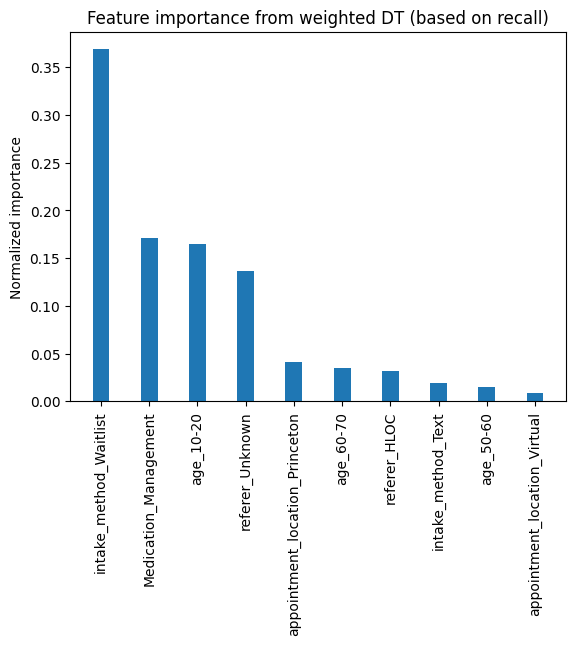

In [95]:
fig, ax = plt.subplots()

ax.bar(fi_df['feature'][:10], fi_df['importance'][:10], width = 0.35)
#ax.set_xticks(np.arange(10))
ax.set_xticklabels(fi_df['feature'][:10], rotation = 90)
plt.title('Feature importance from weighted DT (based on recall)')
ax.set_ylabel('Normalized importance')